In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import random
import math
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objects as go


In [2]:
dataset = pd.read_excel('gdpGROWTH.xls')

In [3]:
dataset2 = pd.read_excel('gdp2.xlsx')

In [4]:
dataset.head()

,Date,China,France,Germany,Italy,Kazakhstan,Russian Federation,Spain,Turkey,United States
0,2004,10.2,2.8,1.2,1.4,9.6,7.2,3.1,9.6,3.8
1,2005,11.4,1.7,0.7,0.8,9.7,6.4,3.7,9.0,3.5
2,2006,12.7,2.4,3.8,1.8,10.7,8.2,4.1,7.1,2.9
3,2007,14.3,2.4,3.0,1.5,8.9,8.5,3.6,5.0,1.9
4,2008,9.7,0.3,1.0,-1.0,3.3,5.2,0.9,0.8,-0.1


In [54]:
dataset3 = pd.read_excel('gdp1.xlsx')

In [55]:
dataset3.head()

,Country,after,before
0,China,1.0,5.9
1,Germany,-6.0,0.9
2,France,-5.0,1.0
3,Italy,-7.0,0.4
4,Spain,-7.3,1.6


In [27]:
dataset2.head()

,Date,Country,GDP,Gold,Oil,CPI
0,2004,Kazakhstan,9.6,NaN,NaN,NaN
1,2005,Kazakhstan,9.7,NaN,NaN,NaN
2,2006,Kazakhstan,1.7,NaN,NaN,NaN
3,2007,Kazakhstan,8.9,NaN,NaN,NaN
4,2008,Kazakhstan,3.3,NaN,NaN,NaN


In [28]:
temp_f = dataset.sort_values(by='Date', ascending=True)
temp_f = temp_f.reset_index(drop=True)
dataset.style.background_gradient(cmap='OrRd')

,Date,China,France,Germany,Italy,Kazakhstan,Russian Federation,Spain,Turkey,United States
0,2004,10.2,2.8,1.2,1.4,9.6,7.2,3.1,9.6,3.8
1,2005,11.4,1.7,0.7,0.8,9.7,6.4,3.7,9,3.5
2,2006,12.7,2.4,3.8,1.8,10.7,8.2,4.1,7.1,2.9
3,2007,14.3,2.4,3,1.5,8.9,8.5,3.6,5,1.9
4,2008,9.7,0.3,1,-1,3.3,5.2,0.9,0.8,-0.1
5,2009,9.4,-2.9,-5.7,-5.3,1.2,-7.8,-3.8,-4.7,-2.5
6,2010,10.6,1.9,4.2,1.7,7.3,4.5,0.2,8.5,2.6
7,2011,9.5,2.2,3.9,0.7,7.4,5.1,-0.8,11.1,1.6
8,2012,7.9,0.3,0.4,-3,4.8,3.7,-3,4.8,2.2
9,2013,7.8,0.6,0.4,-1.8,6,1.8,-1.4,8.5,1.8


In [29]:
gdfull = dataset2.groupby(['Date', 'Country']).max()
gdfull = gdfull.reset_index()

temp = gdfull[gdfull['Country']=='Russian Federation'].reset_index()
temp = temp.melt(id_vars='Date', value_vars=['GDP'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
            title='Russian F GDP')
fig.show()

In [30]:
gdfull = dataset2.groupby(['Date', 'Country']).max()
gdfull = gdfull.reset_index()

temp = gdfull[gdfull['Country']=='China'].reset_index()
temp = temp.melt(id_vars='Date', value_vars=['GDP'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
            title='France  GDP')
fig.show()

In [31]:
dataset3.head()

,Country,Growth(2020),Previous
0,China,1.0,5.9
1,Germany,-6.0,0.9
2,France,-5.0,1.0
3,Italy,-7.0,0.4
4,Spain,-7.3,1.6


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [33]:
temp = dataset.groupby('Date')['China'].sum().reset_index()

covid = temp['China']

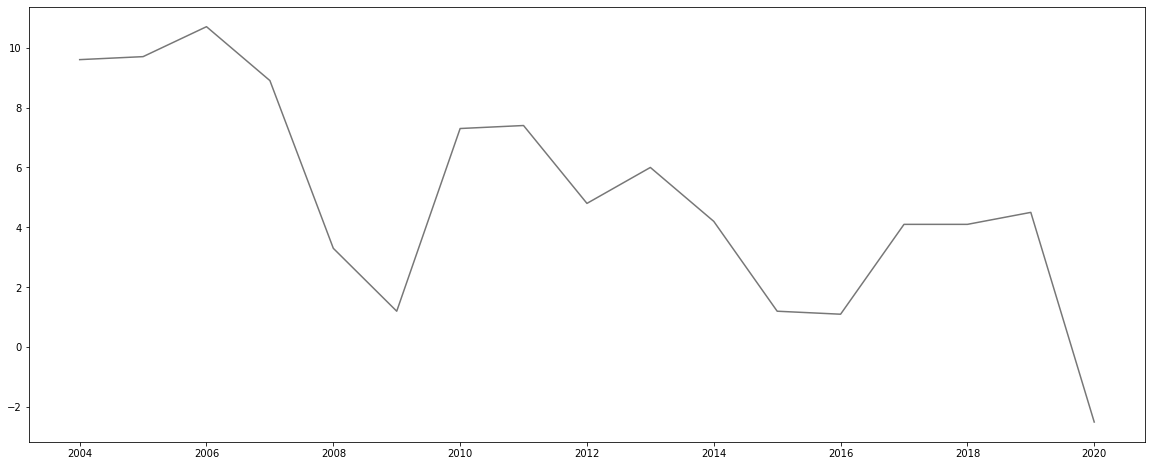

In [68]:
plt.figure(figsize=(20, 8))
ax = plt.plot(temp['Date'], covid, c='#555555', alpha=0.8)

In [35]:
temp = dataset.groupby('Date')['Kazakhstan'].sum().reset_index()

covid = temp['Kazakhstan']

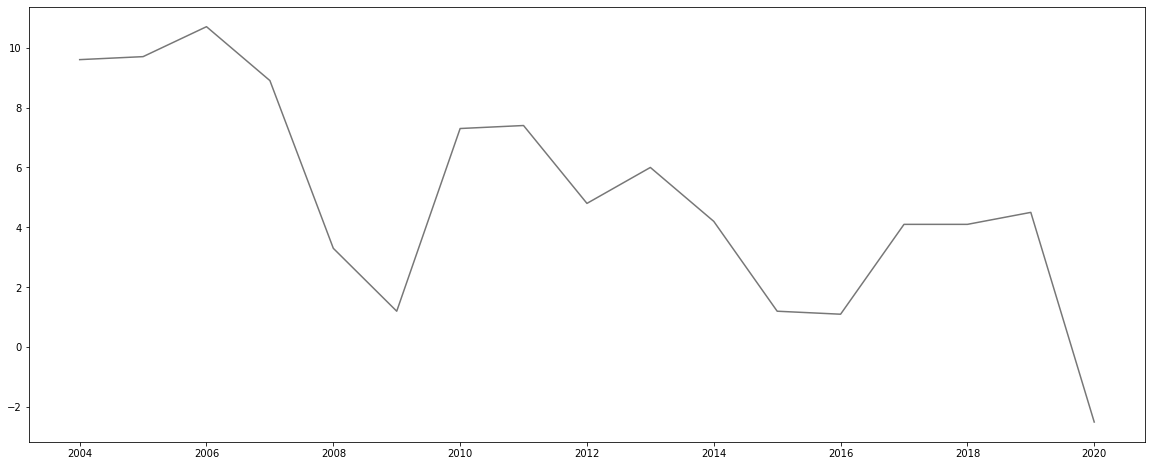

In [36]:
plt.figure(figsize=(20, 8))
ax = plt.plot(temp['Date'], covid, label='COVID-19 (2019-2020)', c='#555555', alpha=0.8)

In [37]:
def stackedbarplot(x_data, y_data_list, colors, y_data_names="", x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # For each category after the first, the bottom of the
            # bar will be the top of the last category
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

In [57]:
import plotly.graph_objects as go
countries = dataset3['Country']
x = list(range(len(countries)))
# Specify the plots
bar_plots = [
        go.Bar(x=x, y=dataset3['after'], name='after', marker=go.bar.Marker(color='#0343df')),
        go.Bar(x=x, y=dataset3['before'], name='before', marker=go.bar.Marker(color='#e50000')),
]

    # Customise some display properties
layout = go.Layout(
        title=go.layout.Title(text="GDP during quarantine", x=0.5),
        yaxis_title="Seats",
        xaxis_tickmode="array",
        xaxis_tickvals=list(range(27)),
        xaxis_ticktext=tuple(dataset3['Country'].values),
)

    # Make the multi-bar plot
fig = go.Figure(data=bar_plots, layout=layout)

    # Tell Plotly to render it
fig.show()


Text(0.5, 1.0, 'UK election results')

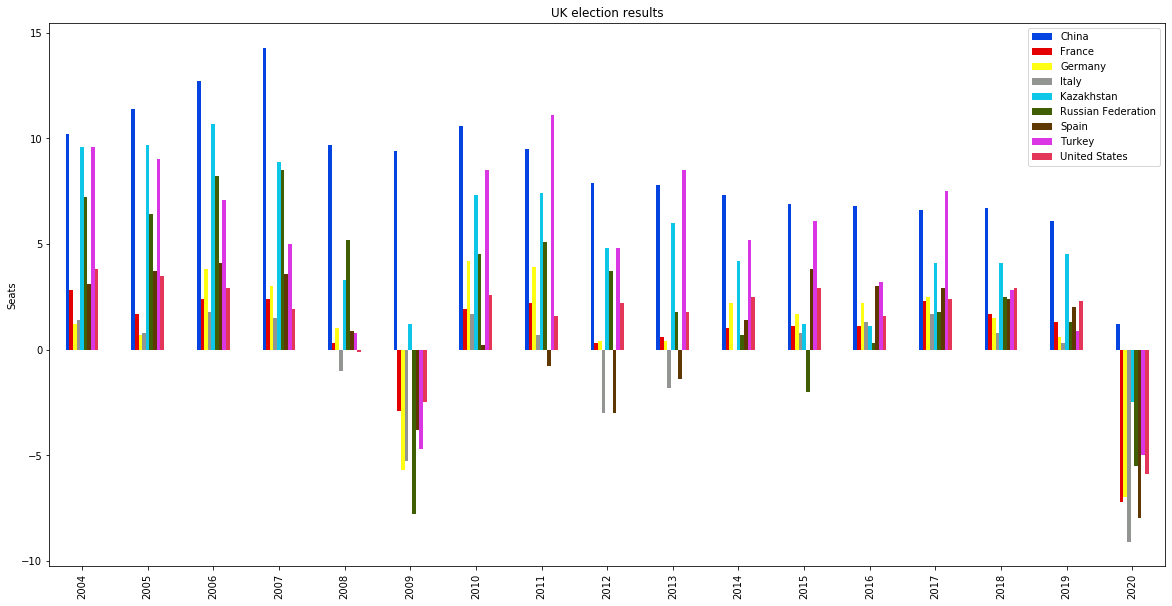

In [60]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#0343df', '#e50000', '#ffff14', '#929591', '#0ec7e8', "#405e03", '#5e3703' , '#da36e3', '#e33659' ])
ax = dataset.plot.bar(x='Date', figsize=(20, 10),colormap=cmap)
ax.set_xlabel(None)
ax.set_ylabel('Seats')
ax.set_title('UK election results')